In [1]:
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Influence of Hyper-parameters

In this Problem I will estimate the influence of hyper-parameters in different problems. The based data is the small data set of gene data.

### Load the data and perparation

In [2]:
data_path = "../01_data/data/p1/"
report_path = "../03_report/problem_03/"
X = np.log2(np.load(data_path + "X.npy") + 1)
y = np.load(data_path + "y.npy")

### Influence of the number of PC's on the T-SNE plot

Show the influence on the T-SNE plot for different numbers of PC's.

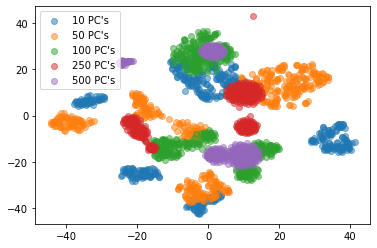

In [37]:
# without pre-defined clusters, only visual distiction
n = [10, 50, 100, 250, 500]
for i in n:
    print(i, end='\r')
    X_PCA = PCA(n_components=i, random_state=42).fit_transform(X)
    X_TSNE  = TSNE(n_components=2, random_state=42).fit_transform(X_PCA)
    plt.scatter(X_TSNE[:,0], X_TSNE[:,1], label="{} PC's".format(i), alpha=0.5)
plt.legend(loc="upper left")
plt.savefig(report_path + "TSNE_PCs.png", dpi=300)

<function matplotlib.pyplot.show(close=None, block=None)>

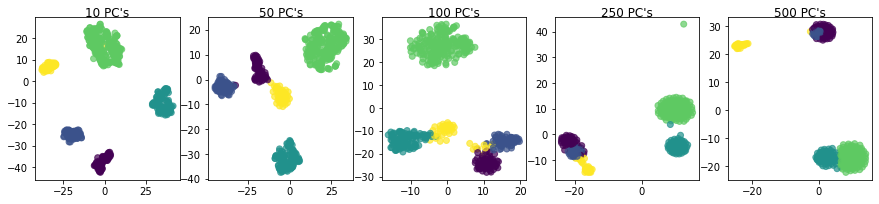

In [38]:
# using the given labels for the data points
fig, axs = plt.subplots(1, 5, figsize=(15,3))
plt.rcParams['axes.titlepad'] = 0  # pad is in points...
for i in range(len(n)):
    print(i, end='\r') 
    X_PCA = PCA(n_components=n[i], random_state=42).fit_transform(X)
    X_TSNE  = TSNE(n_components=2, random_state=42).fit_transform(X_PCA)
    axs[i].scatter(X_TSNE[:,0], X_TSNE[:,1], c=y, alpha=0.7)
    axs[i].set_title("{} PC's".format(n[i]))

plt.savefig(report_path + "TSNE_PCs_labelled.png", dpi=300)
plt.show

### Hyper-parameter tuning

In the following steps I will analyze which setting for hyper-parameters (perplexity and early exaggeration) leads to the best visualization with the T-SNE approach.

The next problem analyzes which number of clusters leads to the best clustering. We use the silhouette and the elbow plot for quantitive purposes. A visualization over the first two PC's demostrates the results.

In [3]:
X_PCA = PCA(n_components=50, random_state=42).fit_transform(X)
perplexity = [5, 10, 30, 100] # 30 default
#learning_rate = [2, 200, 2000] # 200 default
early_exaggeration = [2, 12, 72] # 12 defalt 

In [35]:
# fill a numpy array for faster access
models = np.empty((len(perplexity), len(learning_rate), 511, 2))
i = 0
for p in perplexity:
    j = 0
    for l in early_exaggeration:
        print("{} - {}".format(i, j), end='\r') 
        models[i,j] = TSNE(n_components=2, random_state=42, perplexity=p, early_exaggeration=l).fit_transform(X_PCA)
        j = j + 1
    i = i + 1

<function matplotlib.pyplot.show(close=None, block=None)>

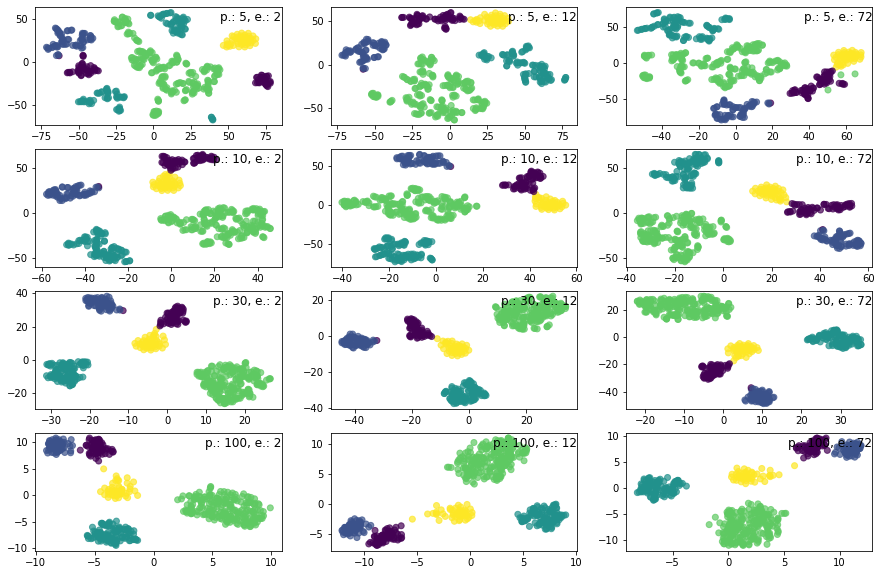

In [36]:
fig, axs = plt.subplots(len(perplexity), len(learning_rate), figsize=(15,10))
#, sharex=True, sharey=True
plt.rcParams['axes.titley'] = 1.0    # y is in axes-relative coordinates.
plt.rcParams['axes.titlepad'] = -14  # pad is in points...
i = 0
for p in perplexity:
    j = 0
    for l in early_exaggeration:
        axs[i, j].scatter(models[i,j,:,0], models[i,j,:,1], c=y, alpha=0.7)
        axs[i, j].set_title("p.: {}, e.: {}".format(p, l), loc='right')
        j = j + 1
    i = i + 1
plt.savefig(report_path + "TSNE_hyper_parameter.png", dpi=300)
plt.show

In [4]:
no_clusters = np.arange(2,50)
models = []
for i in no_clusters:
    print(i, end="\r")
    models.append(KMeans(n_clusters=i, random_state=42).fit(X_PCA))

In [5]:
# data for the silhouette and the "elbow" plot
WGSS = np.empty((len(models), 2))
sil = np.empty((len(models), 2))
for i in range(len(WGSS)):
    WGSS[i,0] = i+2
    WGSS[i,1] = models[i].inertia_
    
    sil[i,0] = i+2
    sil[i,1] = silhouette_score(X_PCA, models[i].labels_)

In [9]:
sil[1:5,1]

array([0.36509906, 0.36705101, 0.36544161, 0.27216312])

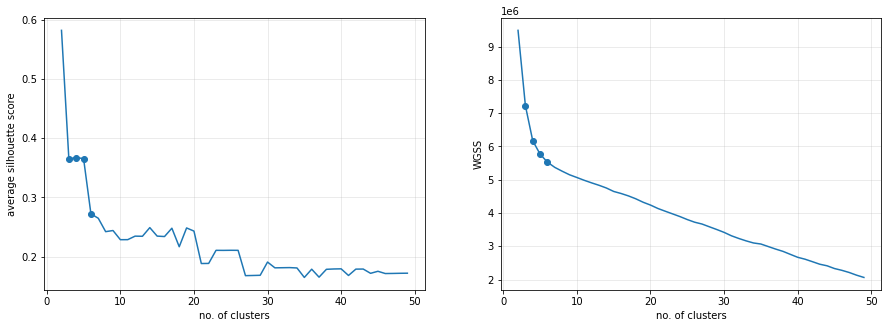

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].grid(alpha=0.3)
axs[0].plot(sil[:,0], sil[:,1])
axs[0].scatter(np.array([3,4,5,6]), sil[1:5,1])
axs[0].set_ylabel("average silhouette score")
axs[0].set_xlabel("no. of clusters")

axs[1].grid(alpha=0.3)
axs[1].plot(WGSS[:,0], WGSS[:,1])
axs[1].scatter(np.array([3,4,5,6]), WGSS[1:5,1])
axs[1].set_ylabel("WGSS")
axs[1].set_xlabel("no. of clusters")

plt.savefig(report_path+"no_of_clusters.png", dpi=300)

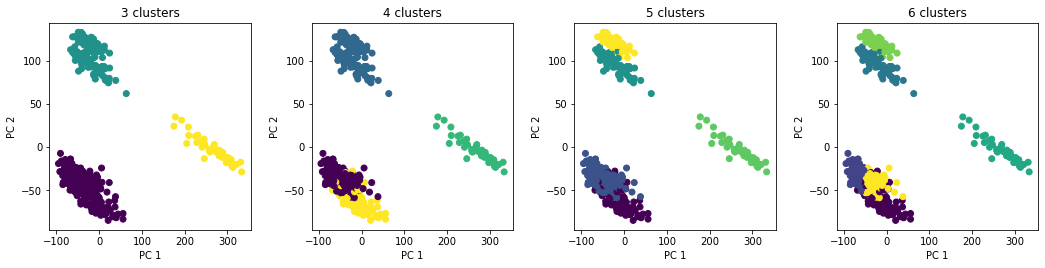

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(15,4))
fig.tight_layout(pad=3.0)
model_no = 1
for ax in axs:
    ax.scatter(X_PCA[:,0], X_PCA[:,1], c=models[model_no].labels_)
    ax.set_title("{} clusters".format(model_no + 2))
    ax.set_xlabel("PC 1")
    ax.set_ylabel("PC 2")
    model_no = model_no + 1
    
plt.savefig(report_path+"no_of_clusters_visualization.png", dpi=300)